In [21]:
#Load Model and data
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score



In [17]:
#Load Feature engineered data
df = pd.read_csv("C:\\Users\\Jones Mbela\\Desktop\\RENNY\\AI AND ML\\Lend Secure\\Data\\featured_engineered_real_estate_data.csv")
df.shape

(144941, 33)

In [18]:
#Defininng X and y
X = df.drop(columns=["price_in_USD"])
y = np.log1p(df["price_in_USD"])


In [19]:
#Recreating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_test.shape, y_test.shape

((21742, 32), (21742,))

In [20]:
#Loading the best model
model= joblib.load("C:\\Users\\Jones Mbela\\Desktop\\RENNY\\AI AND ML\\Lend Secure\\Models\\best_random_forest_model.pkl")

model

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
#Running Inference on the test set
test_pred_log = model.predict(X_test)

In [22]:
#Sanity check
test_mae = mean_absolute_error(y_test, test_pred_log)
test_rmse= root_mean_squared_error(y_test, test_pred_log)
test_r2 = r2_score(y_test, test_pred_log)

test_mae, test_rmse, test_r2

(0.33156788899895884, 0.49278901532607744, 0.7945559088521448)

In [29]:
#Convert predictions and actuals back to original scale
y_test_usd =pd.Series(y_test_usd,name="actual_price_in_USD")
y_pred_usd =pd.Series(y_pred_usd,name="predicted_price_in_USD")

In [30]:
#Sanity check on original scale
y_test_usd.describe(), y_pred_usd.describe()

(count    2.174200e+04
 mean     4.076539e+05
 std      8.167012e+05
 min      2.200000e+03
 25%      1.060493e+05
 50%      1.936605e+05
 75%      4.021630e+05
 max      2.798988e+07
 Name: actual_price_in_USD, dtype: float64,
 count    2.174200e+04
 mean     3.599510e+05
 std      5.758471e+05
 min      1.852337e+03
 25%      1.125007e+05
 50%      1.966600e+05
 75%      3.933073e+05
 max      1.816875e+07
 Name: predicted_price_in_USD, dtype: float64)

In [26]:
#Business Scale Errors
#Absolute Errors usd

absolute_errors = np.abs(y_pred_usd - y_test_usd)
absolute_errors.describe(percentiles=[0.5, 0.75, 0.9, 0.95])

count    2.174200e+04
mean     1.644025e+05
std      5.024271e+05
min      3.929017e-10
50%      4.071083e+04
75%      1.294152e+05
90%      3.578652e+05
95%      6.731208e+05
max      1.728959e+07
Name: price_in_USD, dtype: float64

In [27]:
#Percentage Errors
percentage_errors = absolute_errors / y_test_usd
np.percentile(percentage_errors, [50, 75, 90, 95])


array([0.21617007, 0.4527738 , 0.78025614, 1.16439604])

In [28]:
#Summary
{
    "Median % Error": np.median(percentage_errors),
    "75th Percentile % Error": np.percentile(percentage_errors, 75),
    "90th Percentile % Error": np.percentile(percentage_errors, 90),
}

{'Median % Error': np.float64(0.21617006526619578),
 '75th Percentile % Error': np.float64(0.4527738033865297),
 '90th Percentile % Error': np.float64(0.7802561355738591)}

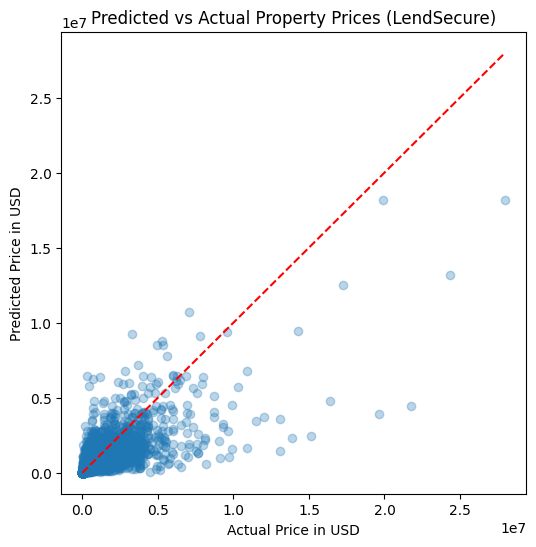

In [33]:
#Predicted vs Actuals plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test_usd, y_pred_usd, alpha=0.3)
min_price = min(y_test_usd.min(), y_pred_usd.min())
max_price = max(y_test_usd.max(), y_pred_usd.max())

plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--')
plt.xlabel("Actual Price in USD")
plt.ylabel("Predicted Price in USD")
plt.title("Predicted vs Actual Property Prices (LendSecure)")
plt.show()



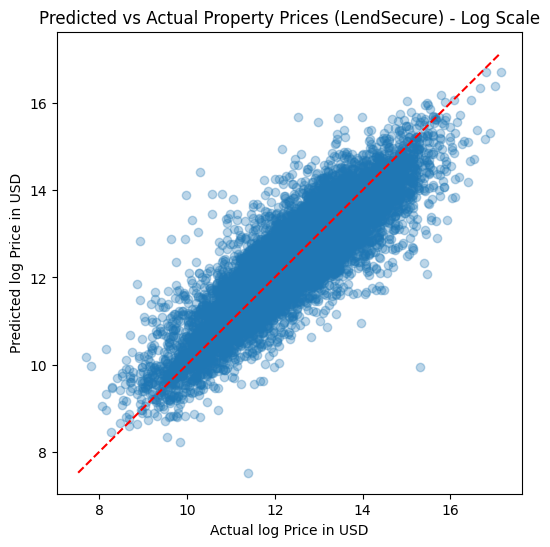

In [34]:
# Log-log version
plt.figure(figsize=(6,6))
plt.scatter(np.log1p(y_test_usd), np.log1p(y_pred_usd), alpha=0.3)
min_val=min(np.log1p(y_test_usd).min(), np.log1p(y_pred_usd).min())
max_val=max(np.log1p(y_test_usd).max(), np.log1p(y_pred_usd).max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel("Actual log Price in USD")
plt.ylabel("Predicted log Price in USD")
plt.title("Predicted vs Actual Property Prices (LendSecure) - Log Scale")
plt.show()


In [40]:
#Residual Analyisis
y_test_usd= pd.Series(np.expm1(y_test)).reset_index(drop=True)
y_pred_usd= pd.Series(np.expm1(test_pred_log)).reset_index(drop=True)
residuals_usd= y_test_usd - y_pred_usd


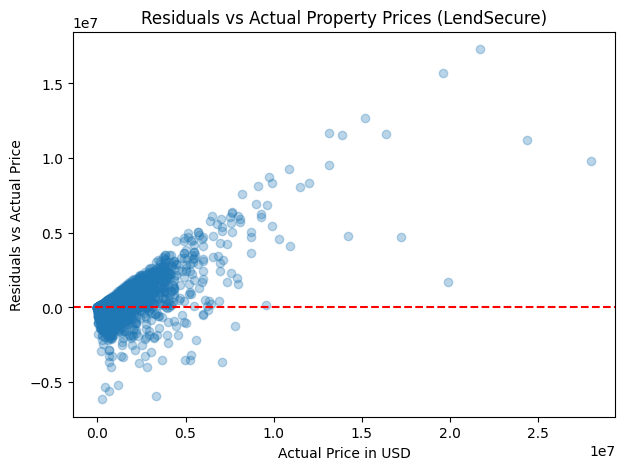

In [41]:
#Residuals vs Actual Prices plot
plt.figure(figsize=(7,5))
plt.scatter(y_test_usd,residuals_usd, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Price in USD")
plt.ylabel("Residuals vs Actual Price")
plt.title("Residuals vs Actual Property Prices (LendSecure)")
plt.show()


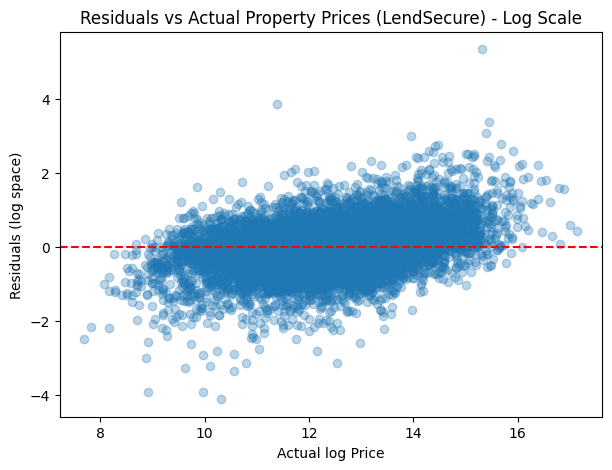

In [42]:
#Residuals in log scale
residual_log= y_test - test_pred_log

plt.figure(figsize=(7,5))
plt.scatter(y_test,residual_log, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual log Price")
plt.ylabel("Residuals (log space)")
plt.title("Residuals vs Actual Property Prices (LendSecure) - Log Scale")
plt.show()


Text(0.5, 1.0, 'Distribution of Residuals (LendSecure)')

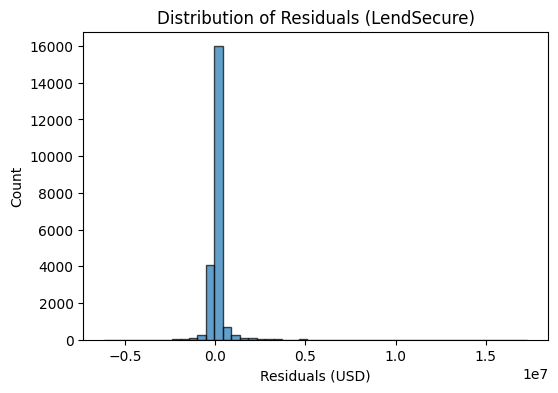

In [43]:
#Residual distribution (Error symmetry check)
plt.figure(figsize=(6,4))
plt.hist(residuals_usd, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals (USD)")
plt.ylabel("Count")
plt.title("Distribution of Residuals (LendSecure)")


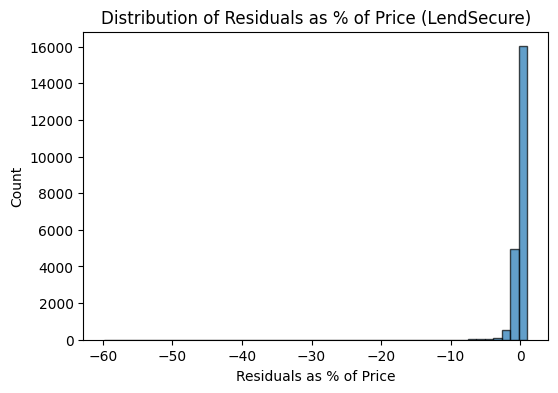

In [44]:
#Residuals as % of price (risk lens)
percentage_residuals = residuals_usd / y_test_usd
plt.figure(figsize=(6,4))
plt.hist(percentage_residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals as % of Price")
plt.ylabel("Count")
plt.title("Distribution of Residuals as % of Price (LendSecure)")
plt.show()


In [45]:
#Feature Importance
importances = model.feature_importances_
feature_importance_df=(
    pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
)
feature_importance_df.head(15)

,Feature,Importance
4,log_apartment_total_area,0.567071
31,location_freq,0.125065
7,country_Belarus,0.110726
3,building_age,0.041457
14,country_Hungary,0.030588
0,building_total_floors,0.030042
1,apartment_rooms,0.016160
12,country_Georgia,0.010209
27,country_Turkey,0.009103
2,apartment_bathrooms,0.008956


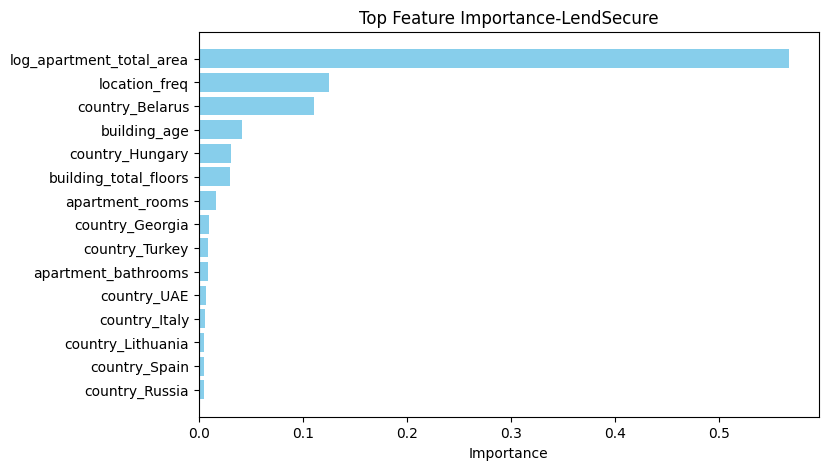

In [48]:
#Visualizing top Features
top_n=15
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df.head(top_n)["Feature"],
    feature_importance_df.head(top_n)["Importance"],
    color='skyblue'
)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top Feature Importance-LendSecure")
plt.show()

In [49]:
#Confidence Tiers
#Creating an evalution Dataframe
import pandas as pd
import numpy as np

eval_df= X_test.copy()
eval_df["actual_price_in_USD"]= y_test_usd
eval_df["predicted_price_in_USD"]= y_pred_usd

In [50]:
#Computing Erros
eval_df["absolute_error_usd"]= np.abs(eval_df["predicted_price_in_USD"] - eval_df["actual_price_in_USD"])
eval_df["percentage_error"]= (eval_df["absolute_error_usd"] / eval_df["actual_price_in_USD"])

In [ ]:
#Defining thresholds for confidence tiers
high_confidence_threshold=0.40
medium_confidence_threshold=0.70

In [67]:
#Assigning confidence tiers
def assign_confidence_tier(percentage_error):
    if percentage_error <= high_confidence_threshold:
        return "High Confidence"
    elif percentage_error <= medium_confidence_threshold:
        return "Medium Confidence"
    else:
        return "Low Confidence"

In [68]:
#Applying it
eval_df["confidence_tier"]= eval_df["percentage_error"].apply(assign_confidence_tier)

In [70]:
#Sanity Check Distribution
eval_df["confidence_tier"].value_counts(normalize=True)

confidence_tier
Low Confidence       0.879818
High Confidence      0.083019
Medium Confidence    0.037163
Name: proportion, dtype: float64

In [71]:
#Decision logic
def lending_decision(tier):
    if tier == "High Confidence":
        return "Auto-Approve Loan"
    elif tier == "Medium Confidence":
        return "Review Manually"
    else:
        return "Physical Valuation Required"

In [72]:
eval_df["lending_decision"]= eval_df["confidence_tier"].apply(lending_decision)

In [73]:
#Summary of decisions
eval_df["lending_decision"].value_counts()

lending_decision
Physical Valuation Required    19129
Auto-Approve Loan               1805
Review Manually                  808
Name: count, dtype: int64

In [74]:
#Tuning thresholds by price bands
import numpy as np
eval_df['price_band'] = pd.cut(
    eval_df['actual_price_in_USD'],
    bins=[0, 200_000, 1_000_000,np.inf],
    labels=['Affordable', 'Mid_market', 'Luxury']
)

In [75]:
#Inpecting error distribution per band
eval_df.groupby('price_band')['percentage_error'].describe(percentiles=[0.5, 0.75, 0.9, 0.95])

C:\Users\Jones Mbela\AppData\Local\Temp\ipykernel_31940\1230755525.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eval_df.groupby('price_band')['percentage_error'].describe(percentiles=[0.5, 0.75, 0.9, 0.95])


,count,mean,std,min,50%,75%,90%,95%,max
price_band,,,,,,,,,
Affordable,1744.0,0.432802,2.005086,5.684870e-14,0.154429,0.388348,0.850525,1.327173,59.766044
Mid_market,1332.0,0.379802,0.775595,2.310008e-14,0.267500,0.461222,0.699656,0.997132,22.005244
Luxury,268.0,0.434927,0.276119,8.104659e-03,0.414906,0.625019,0.783171,0.876846,1.635879


In [76]:
#Defining tier thresholds per band
confidence_thresholds = {
    'Affordable': {'high': 0.30, 'medium': 0.50},
    'Mid_market': {'high': 0.40, 'medium': 0.65},
    'Luxury': {'high': 0.60, 'medium': 0.85}
}

In [84]:
#Applying dynamic confidence tiering
def dynamic_confidence_tier(row):
    band = row['price_band']
    pct_error = row['percentage_error']

    if pd.isna(band):
        return "Low Confidence"
    
    thresholds = confidence_thresholds[band]
    
    if pct_error <= thresholds['high']:
        return "High Confidence"
    elif pct_error <= thresholds['medium']:
        return "Medium Confidence"
    else:
        return "Low Confidence"
eval_df['confidence_tier'] = eval_df.apply(dynamic_confidence_tier, axis=1)

In [85]:
#Map confidence tiers to lending decisions
decision_map = {
    "High Confidence": "Auto-Approve Loan",
    "Medium Confidence": "Review Manually",
    "Low Confidence": "Physical Valuation Required"

}
eval_df["lending_decision"]= eval_df["confidence_tier"].map(decision_map)

In [86]:
#Re-evaluate distribution
eval_df["confidence_tier"].value_counts()

confidence_tier
Low Confidence       18911
High Confidence       2296
Medium Confidence      535
Name: count, dtype: int64

In [87]:
eval_df["lending_decision"].value_counts()

lending_decision
Physical Valuation Required    18911
Auto-Approve Loan               2296
Review Manually                  535
Name: count, dtype: int64

In [91]:
#Sanity check
approval_rates=pd.crosstab(eval_df['price_band'], eval_df['lending_decision'],normalize='index')
approval_rates

lending_decision,Auto-Approve Loan,Physical Valuation Required,Review Manually
price_band,,,
Affordable,0.686353,0.193234,0.120413
Mid_market,0.682432,0.120871,0.196697
Luxury,0.708955,0.055970,0.235075


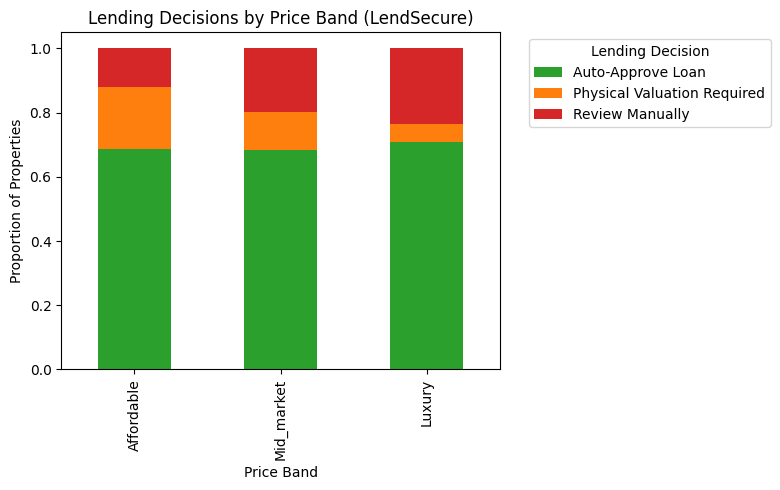

In [92]:
#Visualizations
#Stacked Barch chart
approval_rates.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['#2ca02c', '#ff7f0e', '#d62728']
)
plt.xlabel("Price Band")
plt.ylabel("Proportion of Properties")
plt.title("Lending Decisions by Price Band (LendSecure)")
plt.legend(title="Lending Decision", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [1]:
#Boxplot of percentage errors by price band
